In [2]:
#| title: "Blog Post 4"
#| author: "Niyati Sharma"
#| Description : "Sentimental analysis of uber reviews" 

### **Introduction**

Nowadays, most organizations and businesses develop online services, which add value to their business and even increase their customer base. Surveys and reviews have changed the dynamics of digital marketing. The feedback platform gave the power to customers to post, share, and review content. Customers can directly interact with other customers and companies.There are many companies that use public opinion to be able to achieve the goals of the company. 20-30 companies in the United States of America offer sentiment analysis as one of the tools to help corporate decision-making. Therefore, we use dynamic sentiment to discover additional information. This research uses dynamic sentiment because it can gather more precise and detailed result. 

Along with the increasing number of internet, social media users and mobile devices will certainly impact on the increasing amount of data or user-generated content. The simple forms to collect opinions are application review and rating people give for their experience. With a massive information flows from social media, a highly effective approach is needed to summarize and retrieve information in a real-time situation. Several classification methods are suitable to analyze the data, such as Support Vector Machine (SVM), Naïve Bayes (NB), Nearest Neighbors (NN), Logistic Regression and Decision Tree. The model used to summarize is Naïve Bayes classification method.

We use topic modeling to determine topics that contained
in the data. Numerous way of topic distribution is applicable such as Clustering, Feature Generation, and Dimensionality Reduction. Dimensionality reduction has an advantage compared to the other because each document’s distribution over topics gives a summary of the document. Compare them in this reduce feature space can be more meaningful than comparing in the original feature space.

Uber is one of the largest and greatest innovation in transport with its fast development, the interaction among user in the platform is high.In this research, we aim to dig further information from the dataset. We see the topics from the public opinion perspective in application reviews and ratings, especially their opinion regarding Uber, the sentiment is surely changing every day then which topic has positive or negative sentiment. This is useful for data processing to be more effective and fast. 

### What are research questions?

In this research, we will analyze huge user-generated content which can be used by organizations for their customer engagement strategies.The purpose of this study is to to map the public opinion towards certain topic by analyzing the sentiment of the text and create a topic model. The reviews feedback provide a lot of information about the product experience, any technical or operational gaps, and even their general sentiment towards the product company. The analysis will help in identifying the gaps in the priorities of the stakeholders. With the right customer engagement strategies, companies can make benefit.
 
We pick Uber as the case study, viewed as one of the most favored transportation methods in most part of the world to do the following search question. 

1. Analyse the user's sentiments for Uber cabs.
2. Problems faced by customers.



## How are the data collected?

Collected the data from play store reviews. I scrapped the latest 50,000 reviews from there irrespective of the rating. https://play.google.com/store/apps/details?id=com.ubercab


In [1]:
#installing the required packages
!pip install bertopic
!pip install google-play-scraper 
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.9 MB/s 
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 5.2 MB 36.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 636 kB 55.1 MB/s 
     |████████████████████████████████| 5.5 MB 58.1 MB/s 
     |████████████████████████████████| 1.3 MB 60.9 MB/s 
     |████████████████████████████████| 182 kB 58.3 MB/s 
     |████████████████████████████████| 7.6 MB 46.0 MB/s 
     |████████████████████████████████| 1.1 MB 37.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340686 sha256=a85f7a5881004d997551a132527aa98287a1c4221bffef58f05f0892bb579322
  Stored in directory: /root/.cache

In [3]:
#importing the required packages
from google_play_scraper import Sort, reviews
import pandas as pd
from bertopic import BERTopic
from google.colab import files

In [4]:
#strings
#go to google play store: https://play.google.com/store/apps
#go to playstore app page
#copy the app id id={appid}
appURL = 'com.ubercab'

In [5]:
#scraping reviews from google play store
result, continuation_token = reviews(
    appURL, #app url
    lang='en', #language
    country='us', #country
    sort=Sort.NEWEST,
    count = 50000,
  #  filter_score_with = 1 # defaults to None(means all score)
)

result, _ = reviews(
    appURL,
    continuation_token=continuation_token
)

In [6]:
#putting everything into a dataframe
df = pd.DataFrame(result)

In [7]:
import pandas as pd

In [8]:
#df1 = pd.read_csv('_data/uberData.csv')
#df1

**Discription**

In this post, I will focus on cleaning and pre-processing my data into a format that is useful for analysis. This post will specifically focus on cleaning the content of the reviews, pre-processing them in python, then trying out different descriptives.

**Data Cleaning**

In [9]:
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("en")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading en: Package 'en' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [10]:
def tokenize( data ):
    data1 = data.map(lambda x: word_tokenize(x))
    return data1

def removeStopwords( data ):
    stop_words = set(stopwords.words('english'))
    data1 = data.map(lambda x: [ w for w in x if w.lower() not in stop_words ])
    return data1

def lemmatize( data ):
    lemmatizer = WordNetLemmatizer()
    lemma_words = [ lemmatizer.lemmatize(w, pos='a') for w in data ]
    return lemma_words

# def stemming( data ):
#     ps = PorterStemmer()
#     stemmed_words = [ ps.stem(w) for w in data ]
#     return stemmed_words

def cleaning_data(data):
    data = data.map(lambda x: re.sub(r'\d+', ' ', x)) # Remove numbers
    data = data.map(lambda x: x.translate(x.maketrans('', '', string.punctuation))) # Remove Punctuation
    data = data.map(lambda x: x.strip()) # Remove white spaces
    data = tokenize( data )
    data = removeStopwords( data )
    data = data.map(lambda x: [w for w in x if w.isalpha()]) # Remove non alphabetic tokens
    data = data.map(lambda x: [w for w in x if len(w)>3 ]) #Removing small strings
    data = data.map(lambda x: ' '.join(x)) # turning back to string
    words = set(nltk.corpus.words.words())
    data = data.map(lambda x: [ w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ]) # Remove non english words
    data = data.map(lambda x: ' '.join(x)) # turning back to string
    return data

df['content'] = lemmatize ( cleaning_data(df['content']) )
df = df.loc[df['content']!=''] #remove rows with empty content value

**Word Cloud Plot**

Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency. Here we are trying to find common words in postive,negative and neutral reviews.

In [11]:
def scoreToSentiment(df):
    data = df['score']
    if data<=2:
        return "negative"
    elif data==3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df.apply(lambda x : scoreToSentiment(x), axis = 1)

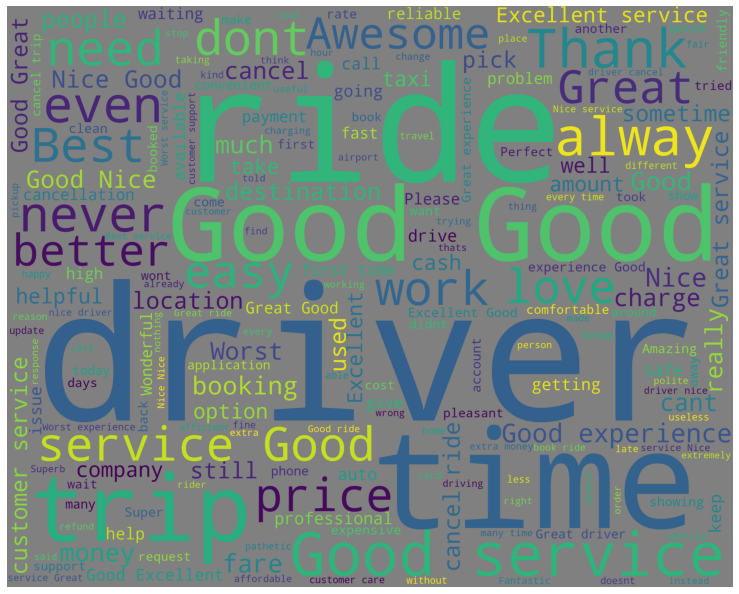

None


In [12]:
def wordcloudPlot(data, color = 'grey'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print(wordcloudPlot(df['content']))

In [13]:
dfPostive = df.loc[df['sentiment']=='positive']
dfNeutral = df.loc[df['sentiment']=='neutral']
dfNegative = df.loc[df['sentiment']=='negative']

**Positive Word Cloud**


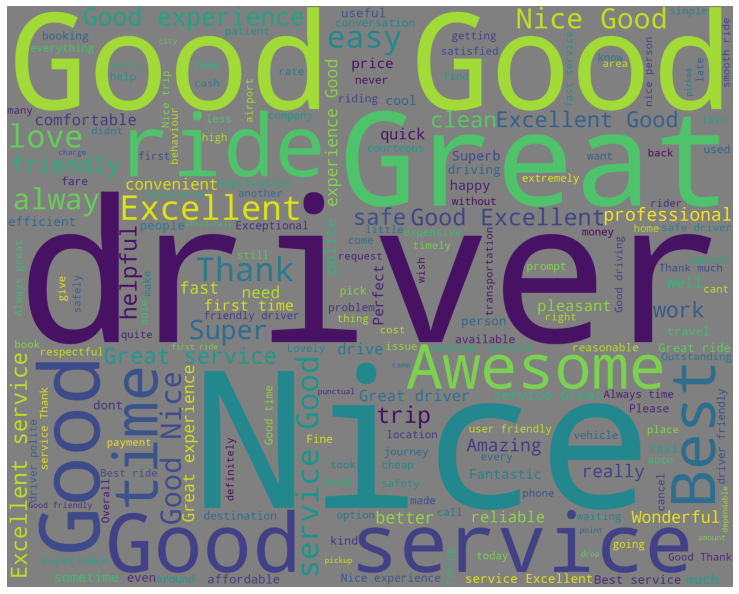

None


In [14]:
print(wordcloudPlot(dfPostive['content']))

**Neutral Word Cloud**

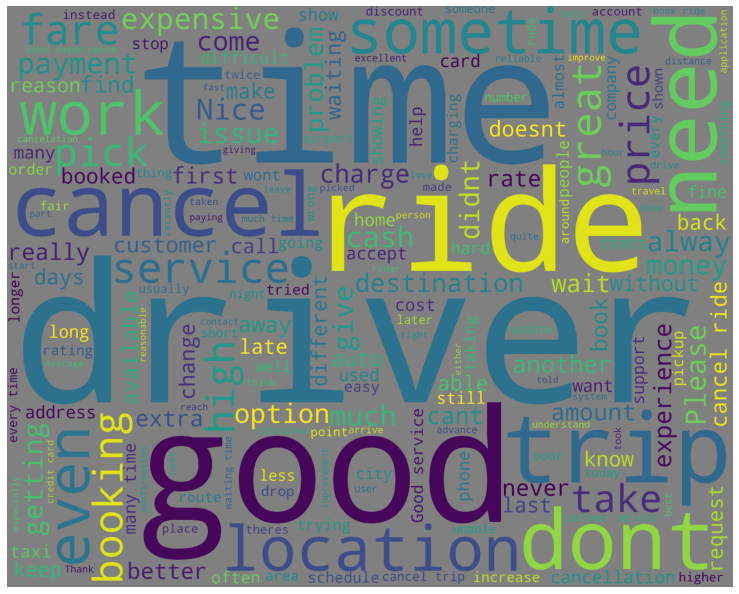

None


In [15]:
print(wordcloudPlot(dfNeutral['content']))

**Negative Word Cloud**

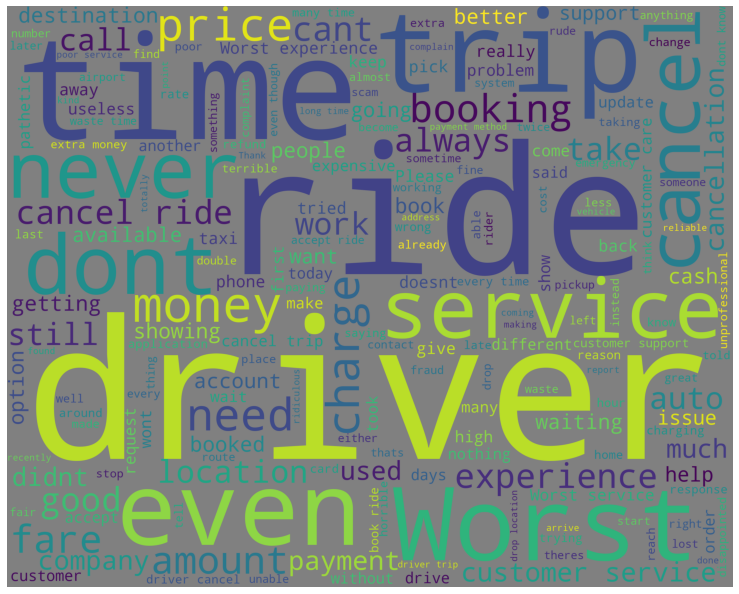

None


In [16]:
print(wordcloudPlot(dfNegative['content']))

**Sentiment Analysis**

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.

The same logic we are using to extract the contextual information from the reviews of uber to analys the what people think about uber. 


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

vectorizer = TfidfVectorizer(max_features=50000)
X = vectorizer.fit_transform(df['content']).toarray()
Y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = True )

In [18]:
from sklearn.metrics import plot_confusion_matrix
def modelPlots(clf, y_pred, y_test):
    print("Accuracy = ", accuracy_score(y_pred, y_test))
    print("Classification report : \n", classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred) #confusion matrix

    plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plt.figure(figsize=(8, 8))
    plt.show()

**Logistic Regression** 

 For Logistic Regression : 

Accuracy =  0.9055247045422185
Classification report : 
               precision    recall  f1-score   support

    negative       0.81      0.85      0.83      3167
     neutral       0.41      0.02      0.03       466
    positive       0.94      0.96      0.95     10413

    accuracy                           0.91     14046
   macro avg       0.72      0.61      0.60     14046
weighted avg       0.89      0.91      0.89     14046



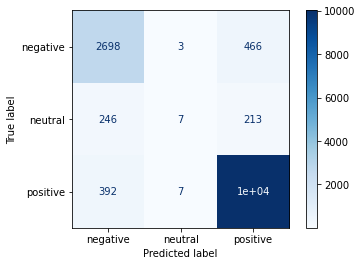

<Figure size 576x576 with 0 Axes>

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( random_state = 1 )
clf = model.fit( X_train, y_train )
y_pred = clf.predict(X_test)

print(" For Logistic Regression : \n")
modelPlots(clf, y_pred, y_test)


**Random Forest**

 For Random Forest : 

Accuracy =  0.8960558166025915
Classification report : 
               precision    recall  f1-score   support

    negative       0.77      0.85      0.81      3167
     neutral       0.19      0.02      0.03       466
    positive       0.94      0.95      0.94     10413

    accuracy                           0.90     14046
   macro avg       0.63      0.60      0.59     14046
weighted avg       0.88      0.90      0.88     14046



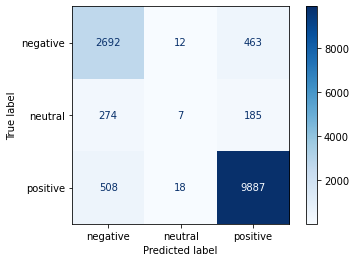

<Figure size 576x576 with 0 Axes>

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(  )
clf = model.fit( X_train, y_train )
y_pred = clf.predict(X_test)

print(" For Random Forest : \n")
modelPlots(clf, y_pred, y_test)

**Bernoulli Naive Bayes** 

 For Naybe Bayes : 

Accuracy =  0.8617399971522142
Classification report : 
               precision    recall  f1-score   support

    negative       0.77      0.69      0.73      3167
     neutral       0.11      0.04      0.05       466
    positive       0.89      0.95      0.92     10413

    accuracy                           0.86     14046
   macro avg       0.59      0.56      0.57     14046
weighted avg       0.84      0.86      0.85     14046



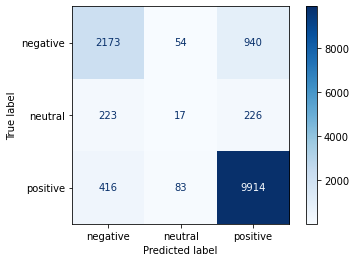

<Figure size 576x576 with 0 Axes>

In [21]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(  )
clf = model.fit( X_train, y_train )
y_pred = clf.predict(X_test)

print(" For Naybe Bayes : \n")
modelPlots(clf, y_pred, y_test)

After comparing different models we can say that Logistic regression model predicts the outcome with highest (90%) accuracy. 